<a href="https://colab.research.google.com/github/jackieMboyaAchieng/Food-Prices/blob/main/Food_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [4]:
file_name = 'food prices.xlsx' # change it to the name of your excel file
food_prices = pd.read_excel(file_name)
food_prices.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.50
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.24
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,KES,1800.00,24.94


## Understanding Data

In [5]:
food_prices.shape

(11999, 14)

**The dataset has 11,999 rows of data and 14 colums.**

In [6]:
food_prices.dtypes

,0
date,datetime64[ns]
admin1,object
admin2,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [7]:
food_prices.describe(include='object')

,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency
count,11999,11999,11999,11999,11999,11999,11999,11999,11999
unique,7,22,62,8,47,13,2,2,1
top,Rift Valley,Nairobi,Nairobi,cereals and tubers,Maize (white),KG,actual,Wholesale,KES
freq,4790,2425,1182,5880,1229,5403,7677,6196,11999


In [8]:
food_prices[['price', 'usdprice']].describe()

,price,usdprice
count,11999.000000,11999.000000
mean,1849.576110,17.289079
std,2960.715674,26.456228
min,5.000000,0.040000
25%,55.205000,0.540000
50%,150.000000,1.210000
75%,2754.500000,26.960000
max,18900.000000,150.810000


## Data Cleaning and Preprocessing

In [9]:

# Get the value counts for each category
category_counts = food_prices['category'].value_counts()

# Display the category distribution
category_counts

,count
category,
cereals and tubers,5880
pulses and nuts,2390
vegetables and fruits,1453
miscellaneous food,653
oil and fats,529
milk and dairy,494
"meat, fish and eggs",466
non-food,134


- **"cereals and tubers" is the most frequent category in the dataset with 5,880 entries.**

#### check for unique categories

In [10]:
# Rename columns to remove leading and trailing spaces
food_prices.columns = food_prices.columns.str.strip()

#### Check for missing values and handle them if any is present.

In [11]:
#Missng values
food_prices.isna().sum()

,0
date,0
admin1,0
admin2,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
priceflag,0


# Exploratory Data Analysis

### Cereals and Tubers as Staple foods in Kenya

In [12]:
# Check if 'admin1' exists and rename it if necessary
if 'admin1' in food_prices.columns:
    food_prices.rename(columns={'admin1': 'provincial_region'}, inplace=True)
else:
    print("Column 'admin1' not found!")

# Check if renaming was successful
print(food_prices.columns)

Index(['date', 'provincial_region', 'admin2', 'market', 'latitude',
       'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice'],
      dtype='object')


#### Distribution of Food categories

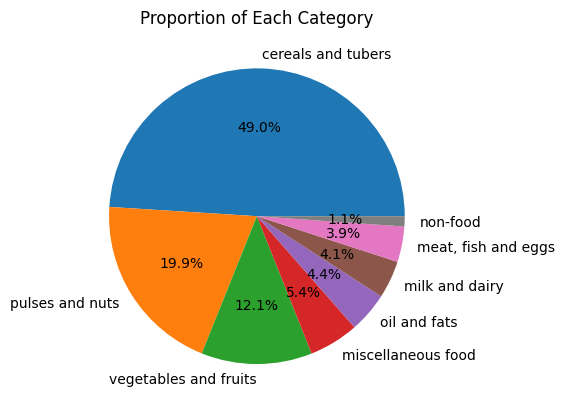

In [13]:
# Pie chart for 'category'
proportions_category = food_prices['category'].value_counts()
food_prices.rename(columns={'admin1': 'provincial region'}, inplace=True)
proportions_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Each Category')
plt.ylabel('')
plt.show()

**Key Insights**:<br>
***Dominance of Cereals and Tubers***: This category constitutes the largest portion of 49% of the total. This suggests a significant reliance on these food products in the Kenya.

***Importance of Pulses and Nuts***: With 19.9% of the data, pulses and nuts represent a substantial component of the diet. These are excellent sources of protein and other essential nutrients.

***Vegetables and Fruits Underrepresented***: While crucial for a balanced diet, vegetables and fruits comprise only 12.1% of the dataset. This indicates a potential area for dietary improvement.

***Moderate Consumption of Other Categories***: The remaining categories (meat, fish, eggs, milk and dairy, oil and fats, miscellaneous food, and non-food) occupy relatively smaller proportions of the dataset. <br>

**Potential Implications**:<br>
***Dietary Challenges***: The relatively low proportion of fruits, vegetables, and potentially protein-rich foods like meat, fish, and eggs could indicate potential nutritional deficiencies in the population.<br>
***Food Security***: A heavy reliance on cereals and tubers might make the population vulnerable to fluctuations in their production or prices.<br>
Policy Implications: The data could inform policies aimed at promoting diversified diets, increasing fruit and vegetable consumption, and addressing food security concerns.

#### Market Distribution

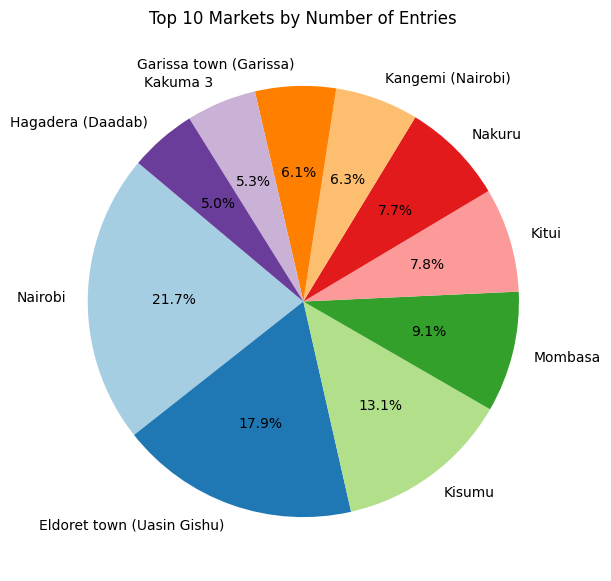

In [14]:
market_counts = food_prices['market'].value_counts()
top_ten_markets = market_counts.head(10)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_ten_markets, labels=top_ten_markets.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(10)))
plt.title('Top 10 Markets by Number of Entries')
plt.show()

**Insights**:<br>

***Nairobi Dominance***: Nairobi is the leading market, capturing a substantial 21.7% of the total entries. This highlights its significance as a major commercial hub in Kenya. <br>
***Regional Distribution***: The chart showcases a good representation of markets across different regions of Kenya. We see major cities like Mombasa (13.1%), Kisumu (17.9%), and Eldoret (9.1%) featured prominently, indicating their importance in terms of market activity.<br>
***Emerging Markets***: Notably, markets like Garissa, Kakuma, and Hagadera, located in the North Eastern and Rift Valley regions, have a presence in the top 10. This suggests growing economic activity and market potential in these areas.<br>
***Market Concentration***: While Nairobi holds a dominant position, the remaining markets share a relatively smaller portion of the total entries. This suggests opportunities for expansion and growth in these regions.

### Price variation across regions

<Figure size 1400x800 with 0 Axes>

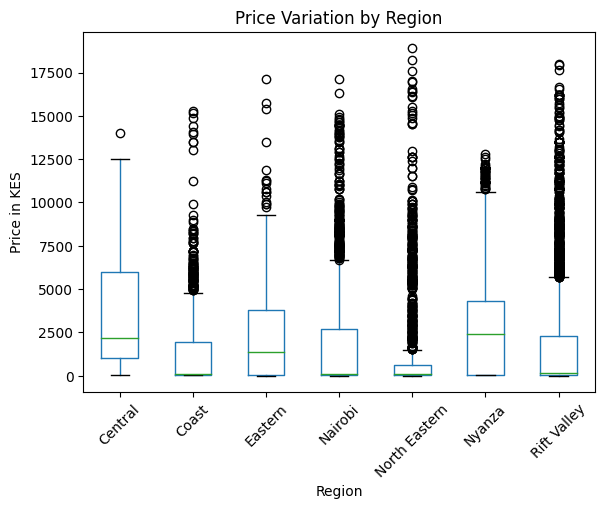

In [15]:
plt.figure(figsize=(14, 8))
food_prices.boxplot(column='price', by='provincial_region', grid=False)
plt.xlabel('Region')
plt.ylabel('Price in KES')
plt.title('Price Variation by Region')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

**Insights**:

Price Variation: There is significant price variation across different regions for the product represented.

Median Prices:
- Nairobi has the highest median price.
- Central, Coast, and Eastern regions have similar median prices, which are lower than Nairobi.
- North Eastern, Nyanza, and Rift Valley have the lowest median prices.<br>

**In Central region, majority are producing their own food, hence less people spend on food products.** <br>

Nairobi has the widest price range, suggesting more price variability in this region.
<br>
North Eastern and Nyanza seem to have extreme price points in these regions. <br>

**Possible Explanations for Price Variation:**

- Economic factors: Differences in income levels, purchasing power, and economic development across regions can influence prices.<br>
- Supply and demand: Variations in supply and demand for the product in different regions can affect prices.<br>
- Transportation costs: The cost of transporting the product to different regions can impact prices.<br>
- Market competition: The level of competition among sellers in each region can influence price levels.

#### Filter the dataset to capture only the most common category

In [16]:
# Filter the dataset for the "Cereals and Tubers" category
cereals_tubers_filtered = food_prices[food_prices['category'] == 'cereals and tubers']

# Select only the relevant columns: market, commodity, unit, pricetype, currency, price, usdprice
cereals_tubers_filtered = cereals_tubers_filtered[['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price', 'usdprice']]

# Display the first few rows of the filtered dataset
cereals_tubers_filtered


,date,market,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Mombasa,Maize,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Mombasa,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.50
3,2006-01-15,Kitui,Maize (white),KG,actual,Retail,KES,17.00,0.24
4,2006-01-15,Kitui,Sorghum,90 KG,actual,Wholesale,KES,1800.00,24.94
5,2006-01-15,Marsabit,Maize (white),KG,actual,Retail,KES,21.00,0.29
...,...,...,...,...,...,...,...,...,...
11989,2024-06-15,Kalobeyei (Village 2),Sorghum,KG,aggregate,Retail,KES,70.00,0.54
11992,2024-06-15,Kalobeyei (Village 3),Maize,KG,aggregate,Retail,KES,50.00,0.39
11993,2024-06-15,Kalobeyei (Village 3),Maize flour,KG,aggregate,Retail,KES,80.00,0.62
11994,2024-06-15,Kalobeyei (Village 3),Rice,KG,aggregate,Retail,KES,135.00,1.04


In [17]:
print(cereals_tubers_filtered.columns)

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice'],
      dtype='object')


<ipython-input-18-e37e3934b6fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=commodity_counts.index, y=commodity_counts.values, palette='viridis')


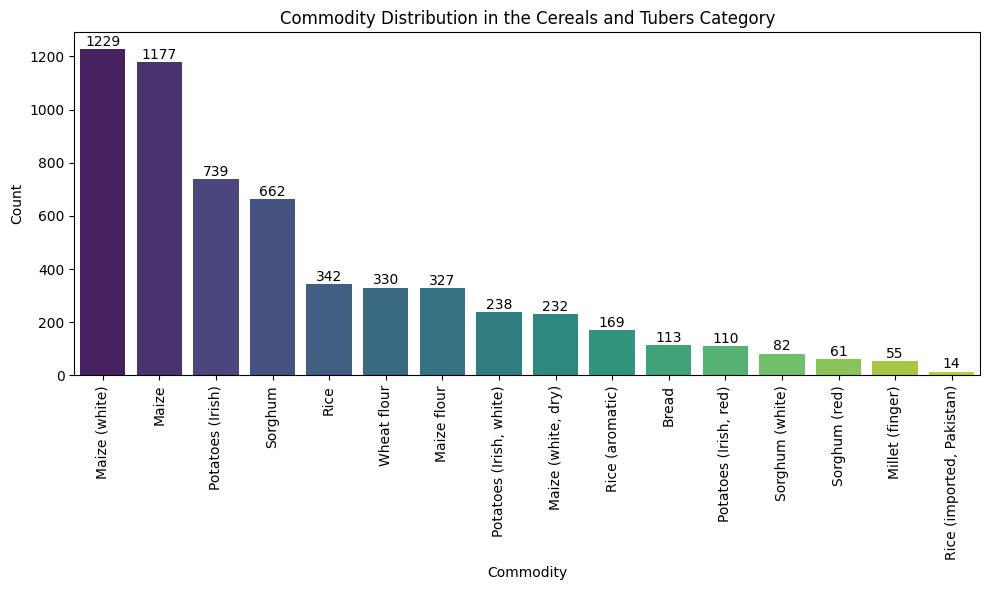

In [18]:
# Create a bar plot to visualize commodity categories in data2
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each commodity in the filtered dataset
commodity_counts = cereals_tubers_filtered['commodity'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=commodity_counts.index, y=commodity_counts.values, palette='viridis')

# Annotate each bar with the exact count
for index, value in enumerate(commodity_counts.values):
    plt.text(index, value + 0.5, f'{value}', ha='center', va='bottom')


# Customize the plot
plt.title('Commodity Distribution in the Cereals and Tubers Category')
plt.xlabel('Commodity')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

**Insights**<br>
- **Maize (white)** is the most purchased commodity. Indicating most Kenya families depend on maize as a staple food.

## Standardize unit and prices

In [19]:
import re

# Function to clean units and adjust prices
def standardize_price(row):
    unit = row['unit']
    price = row['price']

    # Check if the unit is written as "value KG" (e.g., "5 KG")
    match = re.match(r'(\d+)\s?KG', unit)  # Regular expression to capture the numeric value before "KG"

    if match:
        # Extract the numeric value and divide the price by that value
        kg_value = int(match.group(1))
        standardized_price = round(price / kg_value, 2)  # Round to 2 decimal places
        standard_unit = 'KG'
    elif unit.strip() == 'KG':  # If it's just "KG", return the price as-is
        standardized_price = round(price, 2)  # Round to 2 decimal places
        standard_unit = 'KG'
    else:
        # If the unit is not in KG or value KG format, leave it unchanged
        standardized_price = round(price, 2)  # Ensure price is still rounded
        standard_unit = unit  # Preserve the non-standard unit

    return pd.Series([standardized_price, standard_unit])

# Apply the function to the dataset
cereals_tubers_filtered[['standardized_price', 'standard_unit']] = cereals_tubers_filtered.apply(standardize_price, axis=1)

# Print out a sample of the adjusted data to check
cereals_tubers_filtered[['commodity', 'unit', 'standard_unit', 'priceflag', 'pricetype', 'standardized_price', 'price']]

,commodity,unit,standard_unit,priceflag,pricetype,standardized_price,price
0,Maize,KG,KG,actual,Wholesale,16.13,16.13
1,Maize (white),90 KG,KG,actual,Wholesale,16.44,1480.00
3,Maize (white),KG,KG,actual,Retail,17.00,17.00
4,Sorghum,90 KG,KG,actual,Wholesale,20.00,1800.00
5,Maize (white),KG,KG,actual,Retail,21.00,21.00
...,...,...,...,...,...,...,...
11989,Sorghum,KG,KG,aggregate,Retail,70.00,70.00
11992,Maize,KG,KG,aggregate,Retail,50.00,50.00
11993,Maize flour,KG,KG,aggregate,Retail,80.00,80.00
11994,Rice,KG,KG,aggregate,Retail,135.00,135.00


In [20]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit'],
      dtype='object')

In [21]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

#### Price Distribution

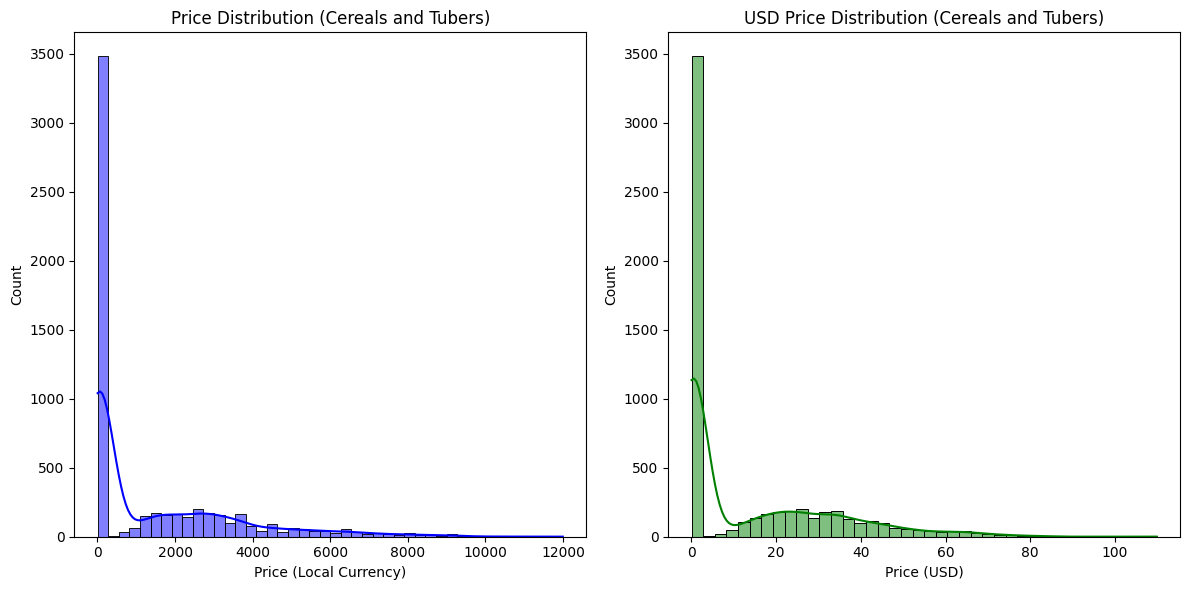

In [22]:

# Summary statistics for the price and usdprice columns
price_stats = cereals_tubers_filtered[['price', 'usdprice']].describe()

# Plot the distribution of prices and usdprice
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the price distribution
plt.subplot(1, 2, 1)
sns.histplot(cereals_tubers_filtered['price'], kde=True, color='blue')
plt.title('Price Distribution (Cereals and Tubers)')
plt.xlabel('Price (Local Currency)')

# Plotting the USD price distribution
plt.subplot(1, 2, 2)
sns.histplot(cereals_tubers_filtered['usdprice'], kde=True, color='green')
plt.title('USD Price Distribution (Cereals and Tubers)')
plt.xlabel('Price (USD)')

plt.tight_layout()
plt.show()


In [23]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

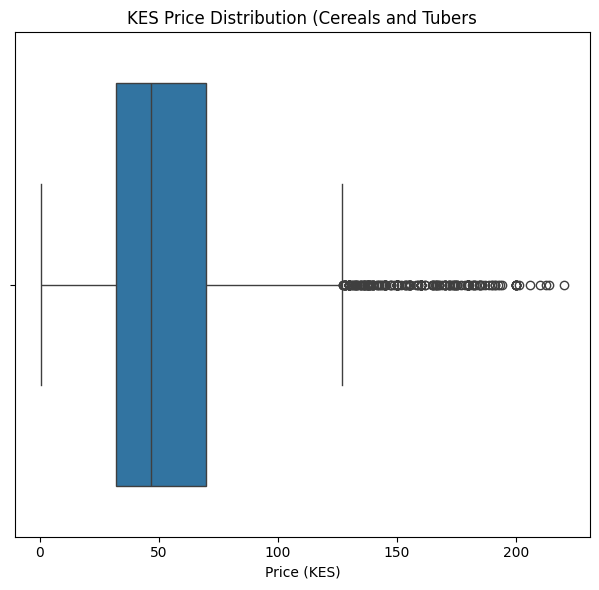

In [24]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the KES price boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=cereals_tubers_filtered['standardized_price'])
plt.title('KES Price Distribution (Cereals and Tubers')
plt.xlabel('Price (KES)')


# Plotting the USD price boxplot
# plt.subplot(1, 2, 2)
# sns.boxplot(cereals_tubers_filtered['usdprice'])
# plt.title('USD Price Distribution for 1 KG (Cereals and Tubers)')
# plt.xlabel('Price (USD)')

plt.tight_layout()
plt.show()

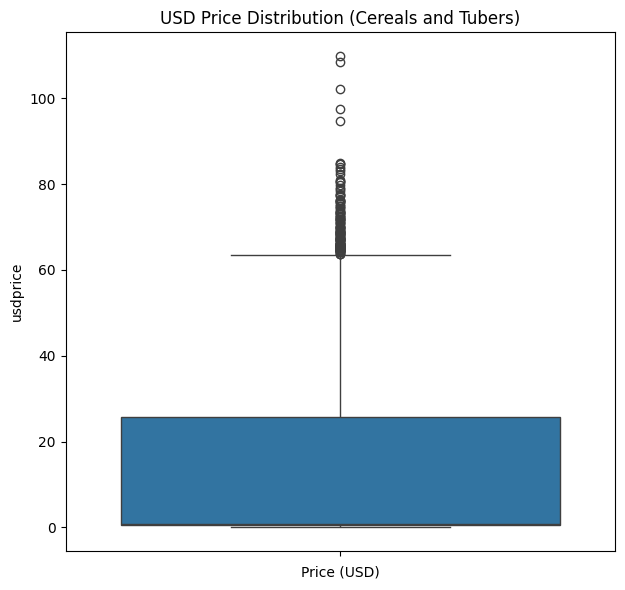

In [25]:
# Plotting the USD price boxplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.boxplot(cereals_tubers_filtered['usdprice'])
plt.title('USD Price Distribution (Cereals and Tubers)')
plt.xlabel('Price (USD)')

plt.tight_layout()
plt.show()

***Insights***
<br><br>
The data shows a wide range in prices, indicating significant variability, likely influenced by factors like commodity type, market type, and region.

**Key Points about Right Skewness**
1. ***Concentration of Lower Prices***: Most of the commodities have prices that are relatively low compared to a few high-priced items.
2. ***Presence of Outliers***: The high prices can be considered outliers or less frequent but significantly higher than the median prices.
3. ***Mean vs. Median***: The mean price will be higher than the median price because the mean is influenced by the high outliers.
4. ***Market Dynamics***: The right skewness might indicate variability in the market prices due to factors like supply and demand, seasonality, or regional price differences.

<br>**Implications of Right Skewness**

1. ***Market Analysis***: This skewness suggests that while most commodities are affordably priced, there are some that can be quite expensive, potentially due to scarcity or higher demand in certain markets.
2. ***Economic Insights***: The higher prices can be due to factors such as transportation costs, import taxes, or market monopolies.
3. ***Policy Making***: Understanding the distribution of prices across regions or seasons can help in making decisions about subsidies, price controls, or interventions in specific markets to address price disparities. <br><br>

In [26]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

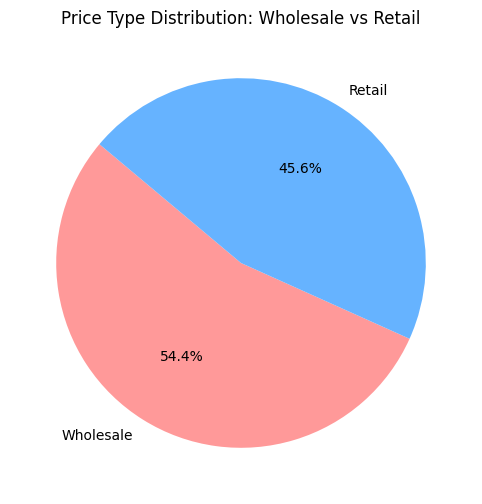

In [27]:
# Calculate the proportion of each priceflag category
pricetype_counts = cereals_tubers_filtered['pricetype'].value_counts()
categories = pricetype_counts.index
values = pricetype_counts.values

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Price Type Distribution: Wholesale vs Retail')
plt.show()

**Insights**<br>
- Most consumers tend to purchase goods on wholesale prices as opposed to retail price

In [28]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit'],
      dtype='object')

In [29]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

In [30]:
# Convert date to datetime format and extract the seasons
cereals_tubers_filtered.loc[:, 'date'] = pd.to_datetime(cereals_tubers_filtered['date'])
cereals_tubers_filtered.loc[:, 'season'] = cereals_tubers_filtered['date'].dt.month % 12 // 3 + 1

# Map season values using season_map
season_map = {1: 'first_quarter', 2: 'second_quarter', 3: 'third_quarter', 4: 'fourth_quarter'}
cereals_tubers_filtered.loc[:, 'season'] = cereals_tubers_filtered['season'].map(season_map)

# Group by commodity and season and calculate average price
avg_price_by_season = cereals_tubers_filtered.groupby(['commodity', 'season'])['standardized_price'].mean().reset_index()

# Print or return the result
avg_price_by_season


,commodity,season,standardized_price
0,Bread,first_quarter,40.564516
1,Bread,fourth_quarter,42.346154
2,Bread,second_quarter,41.259615
3,Bread,third_quarter,41.196000
4,Maize,first_quarter,37.091063
...,...,...,...
58,Sorghum (white),third_quarter,64.149000
59,Wheat flour,first_quarter,86.845357
60,Wheat flour,fourth_quarter,79.201613
61,Wheat flour,second_quarter,86.429072


In [31]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

In [32]:
#Total commodities
unique_commodities = cereals_tubers_filtered['commodity'].value_counts()
unique_commodities

,count
commodity,
Maize (white),1229
Maize,1177
Potatoes (Irish),739
Sorghum,662
Rice,342
Wheat flour,330
Maize flour,327
"Potatoes (Irish, white)",238
"Maize (white, dry)",232


In [33]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit',
       'season'],
      dtype='object')

In [34]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

## Time Series

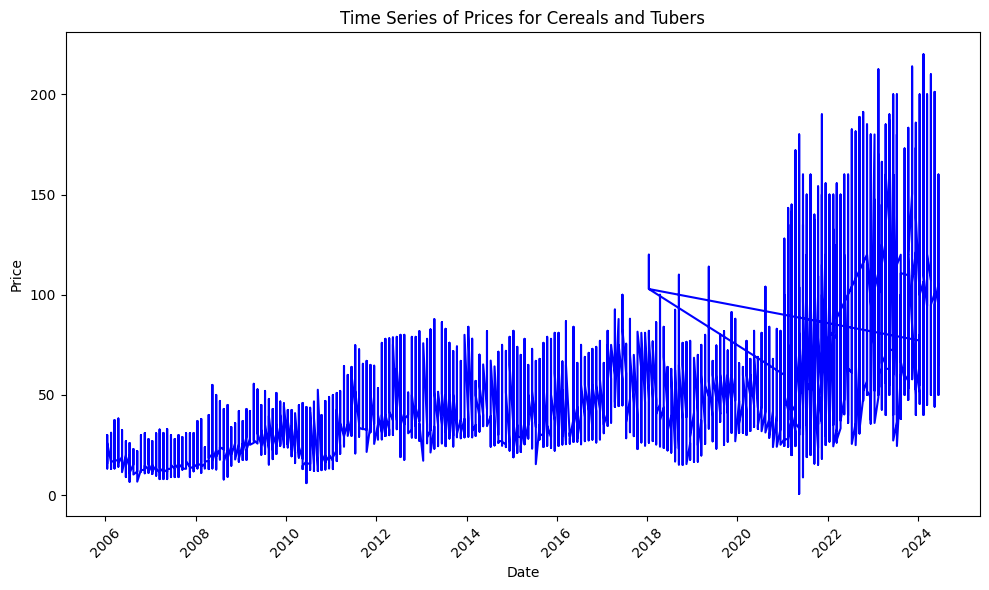

In [35]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(cereals_tubers_filtered['date'], cereals_tubers_filtered['standardized_price'], color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series of Prices for Cereals and Tubers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights**<br>The historical price data shows a gradual increase until around 2019, after which there are periods of high volatility in prices, with a significant spike between 2020 and 2024.
The price fluctuates heavily again, especially from 2021 to 2024.

In [36]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

In [37]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit',
       'season'],
      dtype='object')

## Decompose the Time Series

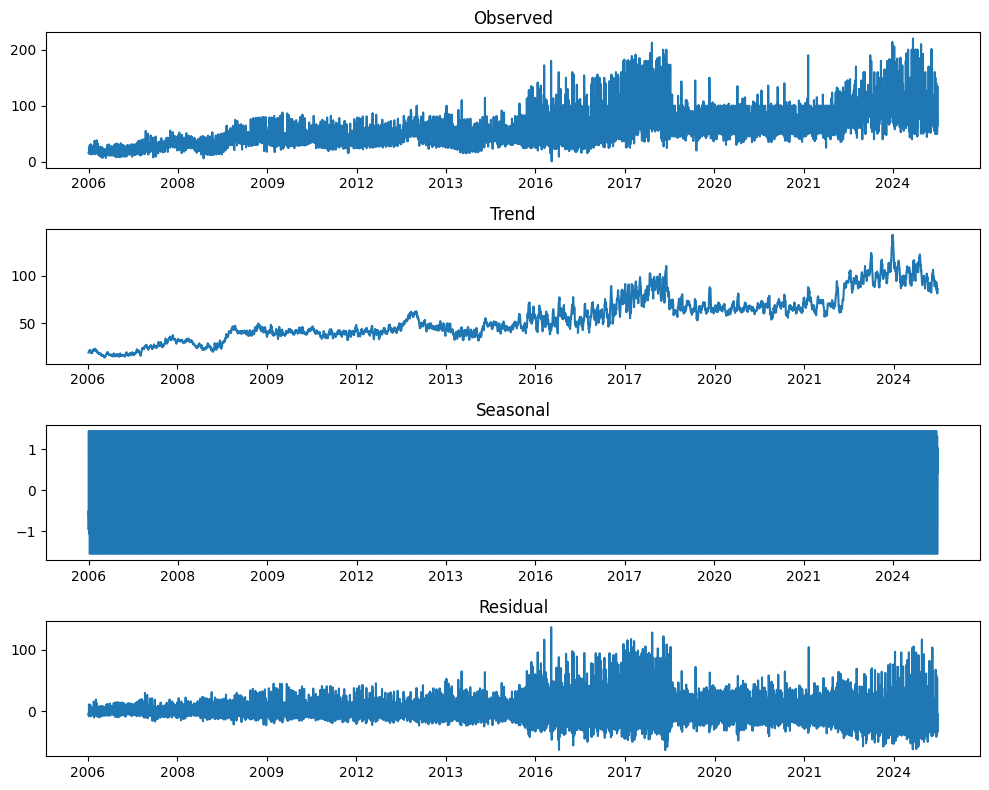

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'cereals_tubers_filtered' is your DataFrame and it has a datetime index
# If not, you need to convert your index to datetime first
# cereals_tubers_filtered.index = pd.to_datetime(cereals_tubers_filtered.index)

# Create a date range from 2006 to 2024
date_range = pd.date_range(start='2006-01-01', end='2024-12-31', periods=len(cereals_tubers_filtered))

# Assign this date range to the DataFrame index
cereals_tubers_filtered.index = date_range

# Decompose the time series
decomposition = seasonal_decompose(cereals_tubers_filtered['standardized_price'], model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Plot the observed data
ax1.plot(cereals_tubers_filtered.index, decomposition.observed)
ax1.set_title('Observed')

# Plot the trend component
ax2.plot(cereals_tubers_filtered.index, decomposition.trend)
ax2.set_title('Trend')

# Plot the seasonal component
ax3.plot(cereals_tubers_filtered.index, decomposition.seasonal)
ax3.set_title('Seasonal')

# Plot the residual component
ax4.plot(cereals_tubers_filtered.index, decomposition.resid)
ax4.set_title('Residual')

# Format the x-axis to show dates
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks(pd.date_range(start='2006', end='2024', periods=10))
    ax.set_xticklabels(pd.date_range(start='2006', end='2024', periods=10).strftime('%Y'))

plt.tight_layout()
plt.show()


In [39]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

In [40]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit',
       'season'],
      dtype='object')

## Check for Stationarity

In [41]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(cereals_tubers_filtered['standardized_price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.114484976395298
p-value: 0.23873015042582912


**Insights**<br>
- The data is not stationary based on the Augmented Dickey-Fuller (ADF) test results. <br>
- The p-value is less than the significance level (usually 0.05), we reject the null hypothesis of non-stationarity, meaning the data is stationary.

In [42]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit',
       'season'],
      dtype='object')

In [43]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

## Differencing to Make the Series Stationary

In [44]:
if 'date' in cereals_tubers_filtered.columns:
    # Convert the date column to datetime
    cereals_tubers_filtered['date'] = pd.to_datetime(cereals_tubers_filtered['date'])
else:
    raise KeyError("The 'date' column is not found in the dataset.")

# Set the date column as the DataFrame index
cereals_tubers_filtered.set_index('date', inplace=True)

# Reset the index to keep 'date' as a column
cereals_tubers_filtered.reset_index(inplace=True)

# Check the dtype of 'standardized_price' before splitting
print("Before splitting:")
print(cereals_tubers_filtered['standardized_price'].dtype)

# Prepare the data for modeling
train_size = int(len(cereals_tubers_filtered) * 0.8)
train, test = cereals_tubers_filtered[:train_size], cereals_tubers_filtered[train_size:]

# Check the dtype of 'standardized_price' after splitting
print("After splitting:")
print(train['standardized_price'].dtype)
print(test['standardized_price'].dtype)

# Define the features and target variable
X_train, y_train = train.index, train['standardized_price']
X_test, y_test = test.index, test['standardized_price']

# Check the dates in the index
print("Train dates:")
print(X_train)
print("Test dates:")
print(X_test)

Before splitting:
float64
After splitting:
float64
float64
Train dates:
RangeIndex(start=0, stop=4704, step=1)
Test dates:
RangeIndex(start=4704, stop=5880, step=1)


In [45]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit',
       'season'],
      dtype='object')

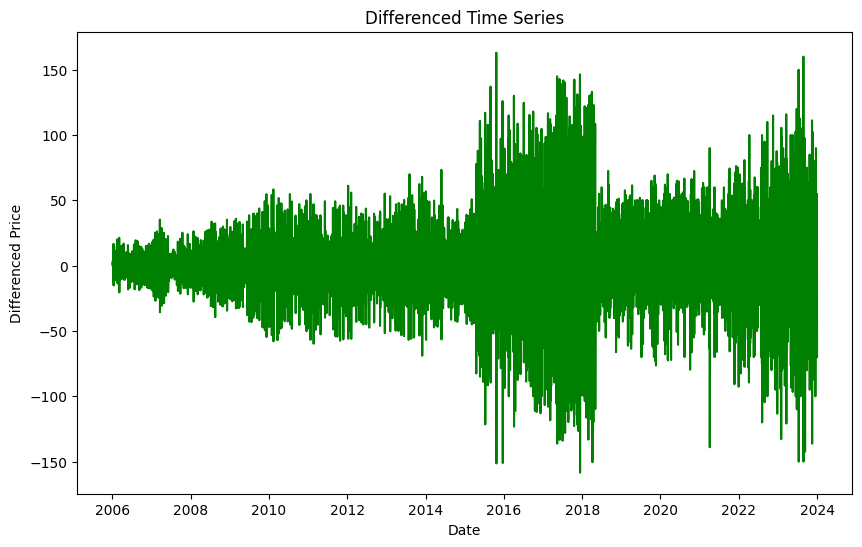

In [46]:
import matplotlib.dates as mdates

# Assuming 'cereals_tubers_filtered' is your DataFrame and has a DateTime index
# Create a date range from 2006 to 2024
date_range = pd.date_range(start='2006-01-01', end='2024', periods=len(cereals_tubers_filtered))

# Update the index of the DataFrame
cereals_tubers_filtered.index = date_range

# Differencing the time series
cereals_tubers_filtered['price_diff'] = cereals_tubers_filtered['standardized_price'].diff()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(cereals_tubers_filtered.index, cereals_tubers_filtered['price_diff'], color='green')

# Format the x-axis to show even years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.title("Differenced Time Series")
plt.show()


In [47]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

## Check for Stationarity on the Differenced data

In [48]:
result = adfuller(cereals_tubers_filtered['price_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -22.462289331880807
p-value: 0.0


**Insights**<br>The p-value is significantly less than 0.05 (the typical significance level), which means we reject the null hypothesis of non-stationarity. This indicates that the time series is stationary.

In [49]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

## Autocorrelation and Partial Autocorrelation Plots

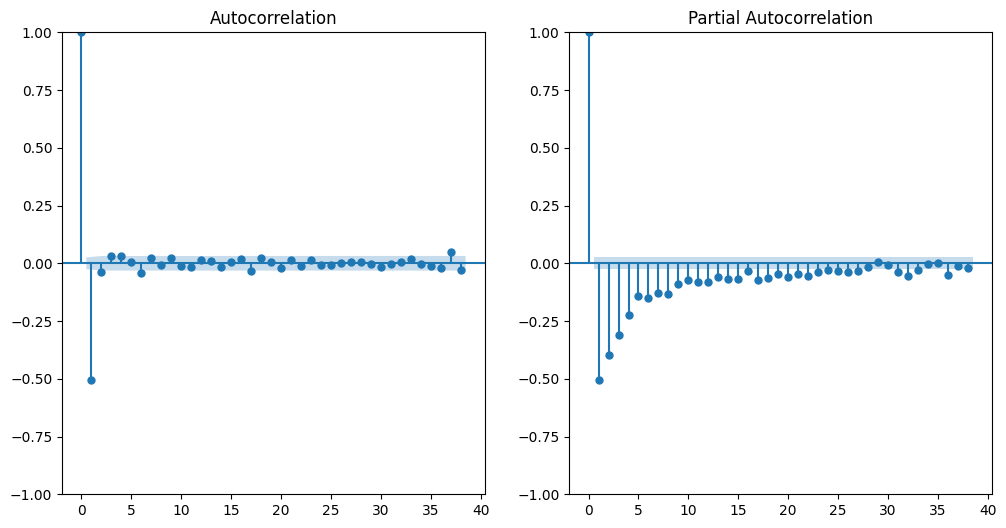

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(cereals_tubers_filtered['price_diff'].dropna(), ax=plt.gca())
plt.subplot(122)
plot_pacf(cereals_tubers_filtered['price_diff'].dropna(), ax=plt.gca())
plt.show()


In [52]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

# Modeling

In [53]:
cereals_tubers_filtered.columns

Index(['date', 'market', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'standardized_price', 'standard_unit',
       'season', 'price_diff'],
      dtype='object')

In [54]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

### Data Preparation for modeling

In [55]:
# Ensure the 'date' column exists and is correctly referenced
if 'date' in cereals_tubers_filtered.columns:
    # Convert the date column to datetime
    cereals_tubers_filtered['date'] = pd.to_datetime(cereals_tubers_filtered['date'])
else:
    raise KeyError("The 'date' column is not found in the dataset.")

# Set the date column as the DataFrame index
cereals_tubers_filtered.set_index('date', inplace=True)

# Reset the index to keep 'date' as a column
cereals_tubers_filtered.reset_index(inplace=True)

# Check the dtype of 'standardized_price' before splitting
print("Before splitting:")
print(cereals_tubers_filtered['standardized_price'].dtype)
# Prepare the data for modeling
train_size = int(len(cereals_tubers_filtered) * 0.8)
train, test = cereals_tubers_filtered[:train_size], cereals_tubers_filtered[train_size:]


# Check the dtype of 'standardized_price' after splitting
print("After splitting:")
print(train['standardized_price'].dtype)
print(test['standardized_price'].dtype)

# Define the features and target variable
X_train, y_train = train.index, train['standardized_price']
X_test, y_test = test.index, test['standardized_price']

Before splitting:
float64
After splitting:
float64
float64


In [56]:
cereals_tubers_filtered['standardized_price'].dtype

dtype('float64')

## ARIMA Model

NameError: name 'forecast' is not defined

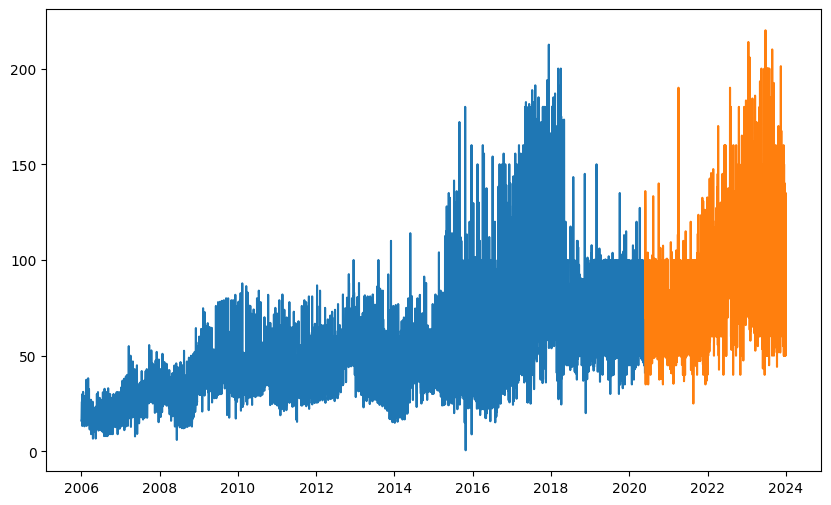

In [57]:
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' and 'test' are your DataFrames and have a DateTime index
# Create a date range from 2006 to 2024
date_range = pd.date_range(start='2006', end='2024', periods=len(train) + len(test))

# Update the index of train and test DataFrames
train.index = date_range[:len(train)]
test.index = date_range[len(train):]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['standardized_price'], label='Train')
plt.plot(test.index, test['standardized_price'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ARIMA Forecast")
plt.legend()
plt.show()


**Insights**<br>The historical price data shows a gradual increase until around 2016, after which there are periods of high volatility in prices, with a significant spike between 2017 and 2018.
After 2019, the price drops but fluctuates heavily again, especially from 2020 to 2024.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'forecast' is your forecasted values and 'test' contains the actual values
# Calculate performance metrics
mae = mean_absolute_error(test['standardized_price'], forecast)
mse = mean_squared_error(test['standardized_price'], forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['standardized_price'] - forecast) / test['standardized_price'])) * 100

# Fit the ARIMA model to get AIC and BIC
model = ARIMA(train['standardized_price'], order=(5, 1, 0))
model_fit = model.fit()
aic = model_fit.aic
bic = model_fit.bic

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

## Conclusion
- There are significant price variations for different types of commodities under the cereals and tubers. Kenyan consumers mostly depend on cereals and tubers. Most consumers prefer to buy on wholesale. This indicate that the prices are relatively affordable compared to the retail price. Additionally, consumers, especially in the central region tend to purchase less as they are able to plant and have their own produce.
## Recommendations
- Consider incorporating additional features that might influence prices, such as economic indicators, weather data, or seasonal effects, to improve the model’s accuracy.
## Next Step
- **Geographical Comparison**: Incorporate the exact latitudes and longitudes to evaluate markets with similar prices.
- **Model Tuning and Optimization**:
- **Model Comparison**: Compare the current ARIMA model with other models like LSTM, machine learning model using AIC and BIC to find the best model.